# This notebook is to examine the checkM statistics
- join the tsv from different batch
- display the removed genomes
- write into genome_stats.tsv

In [15]:
import pandas as pd
import os

indir='/home/hermuba/nas2/prodigal_out/'
stats=[]
for n in range(0,10):
    df=pd.read_csv(os.path.join(indir, f'batch{n}', 'summary.tsv'), 
                  sep = '\t',
                  header = 0,
                  )
    stats.append(df)

all_stat = pd.concat(stats, axis = 0)
all_stat.set_index('Bin Id', inplace = True)

#### OUTPUT #####
fig_path = '/nas2/users/hermuba/fig'

In [2]:
all_stat.head()

,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
Bin Id,,,,,,,,,,,,,
1328432.3,f__Enterobacteriaceae (UID5103),157,1005,324,1,1003,1,0,0,0,99.96,0.08,0.00
1328433.3,f__Enterobacteriaceae (UID5103),157,1005,324,1,995,9,0,0,0,99.96,0.81,11.11
1328434.3,f__Enterobacteriaceae (UID5103),157,1005,324,1,999,5,0,0,0,99.96,0.62,0.00
1328436.3,f__Enterobacteriaceae (UID5103),157,1005,324,1,999,4,1,0,0,99.96,0.51,14.29
1328437.3,f__Enterobacteriaceae (UID5103),157,1005,324,1,999,4,1,0,0,99.96,0.51,14.29


In [3]:
all_stat['Contamination'].max()

32.05

In [4]:
all_stat.shape

(2948, 13)

In [5]:
genome_stat = pd.read_csv('~/nas2/genome_stat/genome_stat.csv', index_col = 0)


In [6]:
genome_stat.head()

,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),# contigs (>= 10000 bp),# contigs (>= 25000 bp),# contigs (>= 50000 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 5000 bp),Total length (>= 10000 bp),...,L75,# N's per 100 kbp,Sequencing Status,Contigs,Genome Length,GC Content,PATRIC CDS,RefSeq CDS,prodigal_CDS,include
1328432.3,47,47,29,25,22,19,5087927,5087927,5048907,5026633,...,8,0.00,WGS,47,5087927,50.5,4907,4683.0,4686,True
1328433.3,5,5,5,5,4,4,5410353,5410353,5410353,5410353,...,1,0.00,WGS,5,5410353,50.6,5410,5134.0,5144,True
1328434.3,23,22,19,19,18,17,5288563,5288021,5277955,5277955,...,8,0.00,WGS,23,5288563,50.7,5171,4941.0,4948,True
1328436.3,11,11,9,9,8,6,5503383,5503383,5497928,5497928,...,2,0.02,WGS,11,5503383,50.4,5425,5187.0,5196,True
1328437.3,18,18,16,16,15,12,5479839,5479839,5474299,5474299,...,7,0.00,WGS,18,5479839,50.4,5436,5190.0,5193,True


In [7]:
genome_stat.shape

(2947, 29)

In [8]:
merged=all_stat.merge(genome_stat, left_index = True, right_index = True)

In [9]:
all_stat.columns

Index(['Marker lineage', '# genomes', '# markers', '# marker sets', '0', '1',
       '2', '3', '4', '5+', 'Completeness', 'Contamination',
       'Strain heterogeneity'],
      dtype='object')

In [10]:
merged.groupby(by = 'include').mean()[all_stat.columns[-3:]]

,Completeness,Contamination,Strain heterogeneity
include,,,
False,26.880000,0.005000,0.000000
True,99.882487,0.273381,2.432054


In [11]:
merged.groupby(by = 'include').std()[all_stat.columns[-3:]]

,Completeness,Contamination,Strain heterogeneity
include,,,
False,19.383174,0.020000,0.000000
True,0.967282,0.658423,9.374842


In [12]:
merged.columns

Index(['Marker lineage', '# genomes', '# markers', '# marker sets', '0', '1',
       '2', '3', '4', '5+', 'Completeness', 'Contamination',
       'Strain heterogeneity', '# contigs (>= 0 bp)', '# contigs (>= 1000 bp)',
       '# contigs (>= 5000 bp)', '# contigs (>= 10000 bp)',
       '# contigs (>= 25000 bp)', '# contigs (>= 50000 bp)',
       'Total length (>= 0 bp)', 'Total length (>= 1000 bp)',
       'Total length (>= 5000 bp)', 'Total length (>= 10000 bp)',
       'Total length (>= 25000 bp)', 'Total length (>= 50000 bp)', '# contigs',
       'Largest contig', 'Total length', 'GC (%)', 'N50', 'N75', 'L50', 'L75',
       '# N's per 100 kbp', 'Sequencing Status', 'Contigs', 'Genome Length',
       'GC Content', 'PATRIC CDS', 'RefSeq CDS', 'prodigal_CDS', 'include'],
      dtype='object')

Text(0.5, 0.98, 'Genome statistics')

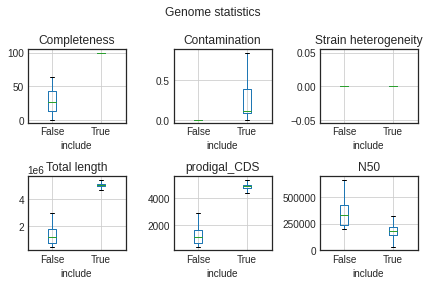

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
#sns.violinplot(data = merged, y = 'Completeness', x = 'include')

f, ax = plt.subplots(2,3)
merged.boxplot(by = 'include', column = ['Completeness'], ax = ax[0,0], showfliers=False)
merged.boxplot(by = 'include', column = ['Contamination'], ax = ax[0,1], showfliers=False)
merged.boxplot(by = 'include', column = ['Strain heterogeneity'], ax = ax[0,2], showfliers=False)

merged.boxplot(by = 'include', column = ['Total length'], ax = ax[1,0], showfliers=False)
merged.boxplot(by = 'include', column = ['prodigal_CDS'], ax = ax[1,1], showfliers=False)
merged.boxplot(by = 'include', column = ['N50'], ax = ax[1,2], showfliers=False)

plt.tight_layout()
plt.suptitle('Genome statistics')

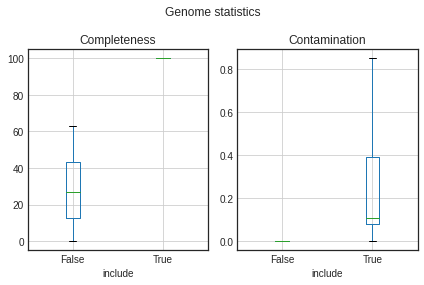

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
#sns.violinplot(data = merged, y = 'Completeness', x = 'include')

f, ax = plt.subplots(1,2)
merged.boxplot(by = 'include', column = ['Completeness'], ax = ax[0], showfliers=False)
merged.boxplot(by = 'include', column = ['Contamination'], ax = ax[1], showfliers=False)
# merged.boxplot(by = 'include', column = ['Strain heterogeneity'], ax = ax[0,2], showfliers=False)

# merged.boxplot(by = 'include', column = ['Total length'], ax = ax[1,0], showfliers=False)
# merged.boxplot(by = 'include', column = ['prodigal_CDS'], ax = ax[1,1], showfliers=False)
# merged.boxplot(by = 'include', column = ['N50'], ax = ax[1,2], showfliers=False)

plt.tight_layout()
plt.suptitle('Genome statistics')

plt.savefig(os.path.join(fig_path,'checkmstat.svg'), format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')
plt.show()